In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

Text(0.5, 0, 'Date')

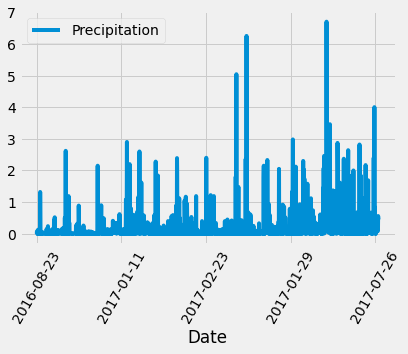

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip)
precip_df = precip_df.set_index(0)
precip_df = precip_df.rename(columns={1:"Precipitation"})

# Sort the dataframe by date
precip_df = precip_df.dropna()
precip_df.sort_values(by=0)
precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(rot=60)
plt.xlabel("Date")

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.agg({"Precipitation":["min","max","mean","median","count"]})

,Precipitation
min,0.000000
max,6.700000
mean,0.177279
median,0.020000
count,2021.000000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

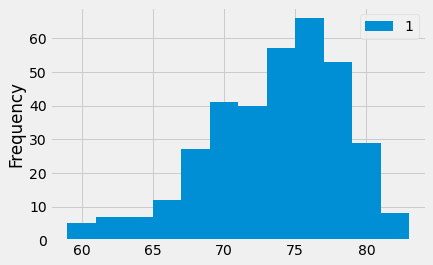

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == "USC00519281").all()

# convert to dataframe
active_df = pd.DataFrame(active)
active_df.head()

active_df.plot.hist(bins=12)

# Close session

In [65]:
# Close Session
session.close()